In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns in output and only 100 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',100)

In [ ]:
from google.colab import files
uploaded = files.upload()

# Save permanently in Colab's local storage
!cp CVD_cleaned.csv /content/

Saving CVD_cleaned.csv to CVD_cleaned.csv
cp: 'CVD_cleaned.csv' and '/content/CVD_cleaned.csv' are the same file


In [ ]:
# filepath = "CVD_cleaned.csv"
data = pd.read_csv("/content/CVD_cleaned.csv")
# df = pd.read_csv("/content/your_dataset.csv")
print("\nDataset Information:\n")
data.info()

print("\nPrinting the first 5 rows:")
data.head()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)          

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
# Finding missing values per column
missing_values = data.isnull().sum()
print(missing_values)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [ ]:
print(len(data))

308854


In [ ]:
# Detecting Outliers using IQR method (Inter Quantile Method)
numerical_columns = data.select_dtypes(include=[np.number]).columns
other_columns = data.select_dtypes(exclude=[np.number]).columns
print("Columns with numbers/numerical columns: ",numerical_columns)
print("\nCategorical Columns: ", other_columns)

Columns with numbers/numerical columns:  Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')

Categorical Columns:  Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')


In [ ]:
print(data['Fruit_Consumption'])

0         30.0
1         30.0
2         12.0
3         30.0
4          8.0
          ... 
308849    30.0
308850    15.0
308851    40.0
308852    30.0
308853     5.0
Name: Fruit_Consumption, Length: 308854, dtype: float64


In [ ]:
for col in numerical_columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
  print(f"{col}: {len(outliers)} outliers")
  # Once we identified the outliers, now we'll use IQR capping (understand it as binning by min/max values)
  data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
  data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

Height_(cm): 1055 outliers
Weight_(kg): 7326 outliers
BMI: 9530 outliers
Alcohol_Consumption: 36147 outliers
Fruit_Consumption: 68225 outliers
Green_Vegetables_Consumption: 11878 outliers
FriedPotato_Consumption: 19456 outliers


In [ ]:
# Checking if outliers are handled or not, if the output is an empty DataFrame, then outlies are handled correctly
# Recalculate IQR bounds
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify any remaining outliers
outliers_remaining = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
print("Remaining Outliers:", outliers_remaining)


Remaining Outliers: Empty DataFrame
Columns: [General_Health, Checkup, Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Sex, Age_Category, Height_(cm), Weight_(kg), BMI, Smoking_History, Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption]
Index: []


In [ ]:
duplicates = data.duplicated().sum()
print(duplicates)

99


In [ ]:
data.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows after removing duplicates: 308755


In [ ]:
# Fixing datatypes
print("Data Types before fixing:\n", data.dtypes)

Data Types before fixing:
 General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object


In [ ]:
categorical_columns = other_columns
print(categorical_columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Smoking_History'],
      dtype='object')


In [ ]:
for col in categorical_columns:
  data[col] = data[col].astype('category')

In [ ]:
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
print("\nData Types After Fixing:\n", data.dtypes)


Data Types After Fixing:
 General_Health                  category
Checkup                         category
Exercise                        category
Heart_Disease                   category
Skin_Cancer                     category
Other_Cancer                    category
Depression                      category
Diabetes                        category
Arthritis                       category
Sex                             category
Age_Category                    category
Height_(cm)                      float64
Weight_(kg)                      float64
BMI                              float64
Smoking_History                 category
Alcohol_Consumption              float64
Fruit_Consumption                float64
Green_Vegetables_Consumption     float64
FriedPotato_Consumption          float64
dtype: object


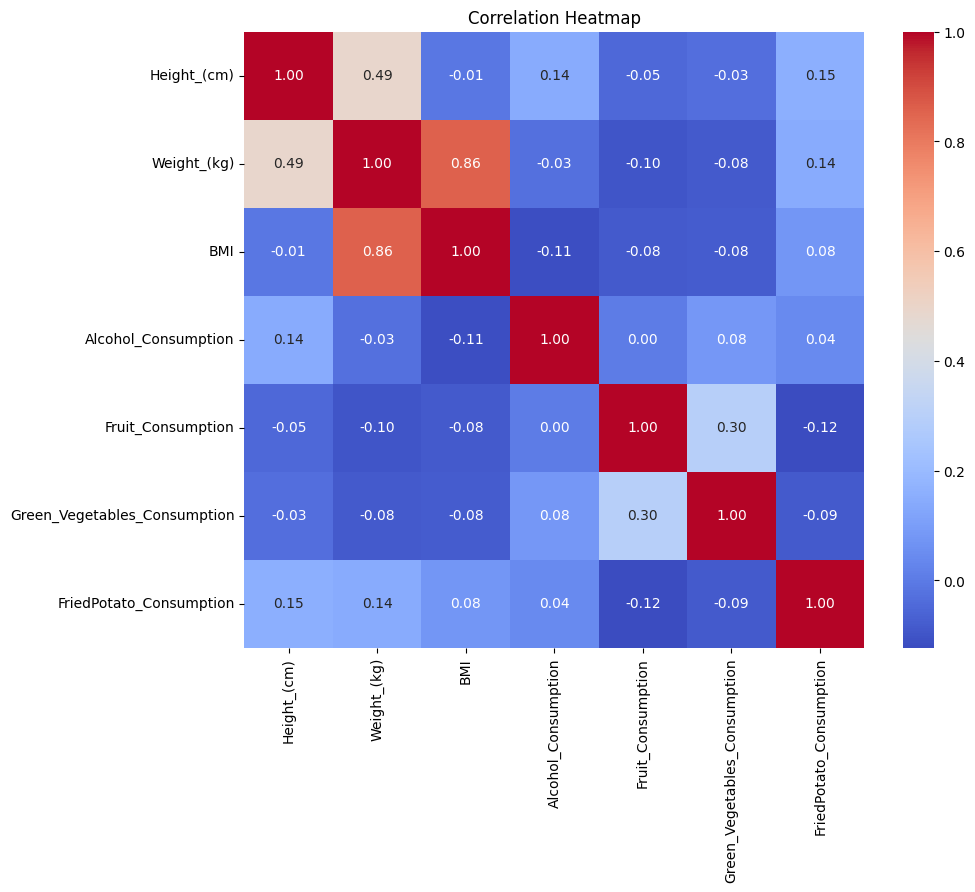

In [ ]:
# Keep only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()